
# 📊 Analyse av personskader basert på ukedagstype

Dette notatet inneholder 7 analyser av trafikkulykker basert på data gruppert etter ukedagstype, skadegrad og måned.

Datasettene dekker skadetall etter:
- År
- Måned
- Ukedagstype (Yrkesdøgn vs. Helgedøgn)
- Skadegrad: Drept, Hardt skadd, Lettere skadd


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("skader_ukedagstype_ny.csv", sep=";", skiprows=13, encoding="utf-8")
df.columns = ["År", "Måned", "Ukedagstype", "Drept", "Hardt skadd", "Lettere skadd", "Sum"]
df.head()


,År,Måned,Ukedagstype,Drept,Hardt skadd,Lettere skadd,Sum
0,2023,April,Yrkesdøgn,7.0,28.0,144.0,179.0
1,2023,April,Helgedøgn,2.0,15.0,86.0,103.0
2,2023,Mai,Yrkesdøgn,8.0,25.0,215.0,248.0
3,2023,Mai,Helgedøgn,5.0,38.0,111.0,154.0
4,2023,Juni,Yrkesdøgn,9.0,64.0,305.0,378.0


## 1. Totalt antall skader per måned

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_10344\520876589.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Måned", y="Sum", estimator=sum, ci=None)


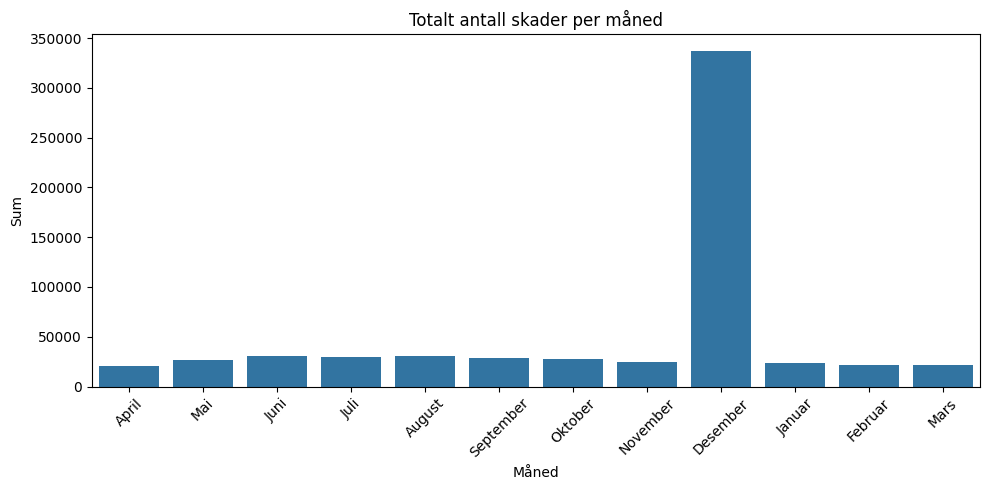

In [4]:

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Måned", y="Sum", estimator=sum, ci=None)
plt.title("Totalt antall skader per måned")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 1. Totalt antall skader per måned
**Observasjon:** Desember skiller seg ekstremt ut med uvanlig høye tall sammenlignet med andre måneder.  
**Mulig feilkilde:** Dette tyder sterkt på en registreringsfeil – f.eks. tusenskille brukt som desimalskille eller summering på tvers av år.  
**Tolkning:** Uten desember ser trafikkulykker ut til å være mer vanlige vår–sommer–tidlig høst, sammenfallende med økt aktivitet.


## 2. Skader fordelt på ukedagstype

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_10344\1465256300.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Ukedagstype", y="Sum", estimator=sum, ci=None)


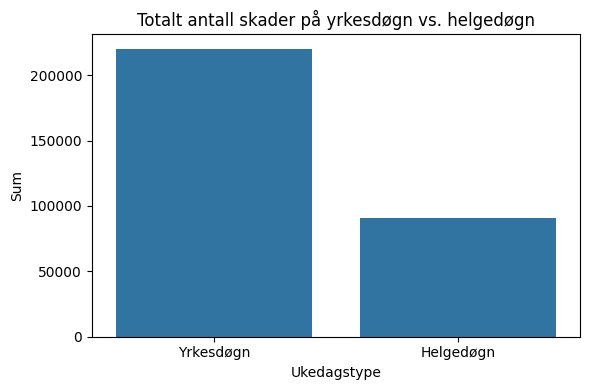

In [5]:

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Ukedagstype", y="Sum", estimator=sum, ci=None)
plt.title("Totalt antall skader på yrkesdøgn vs. helgedøgn")
plt.tight_layout()
plt.show()


### 2. Skader på yrkesdøgn vs. helgedøgn
**Observasjon:** Skader skjer oftere på **yrkesdøgn** enn i helgene.  
**Tolkning:** Dette skyldes sannsynligvis høyere trafikkvolum i hverdagen – skole, arbeid og næringstrafikk.

## 3. Hardt skadde per ukedagstype

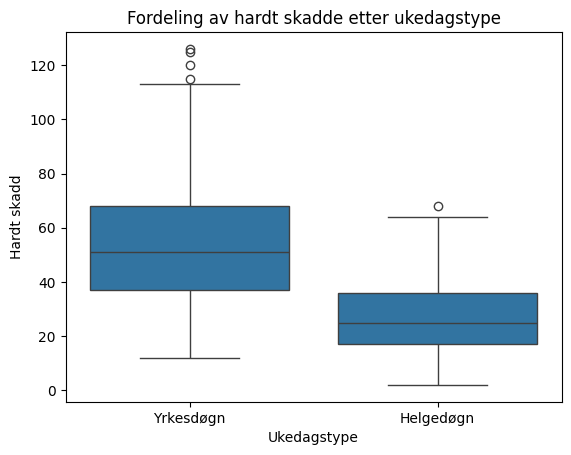

In [6]:

sns.boxplot(data=df, x="Ukedagstype", y="Hardt skadd")
plt.title("Fordeling av hardt skadde etter ukedagstype")
plt.show()


### 3. Hardt skadde etter ukedagstype
**Observasjon:** Høyere median og variasjon i hardt skadde på yrkesdøgn, men enkelte helgedager viser ekstreme verdier.  
**Tolkning:** Risiko for alvorlig skade er høyere i hverdagen, men ekstreme ulykker i helgene kan skyldes rus, fart og nattkjøring.

## 4. Dødsulykker per måned

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_10344\2143791179.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Måned", y="Drept", estimator=sum, ci=None)


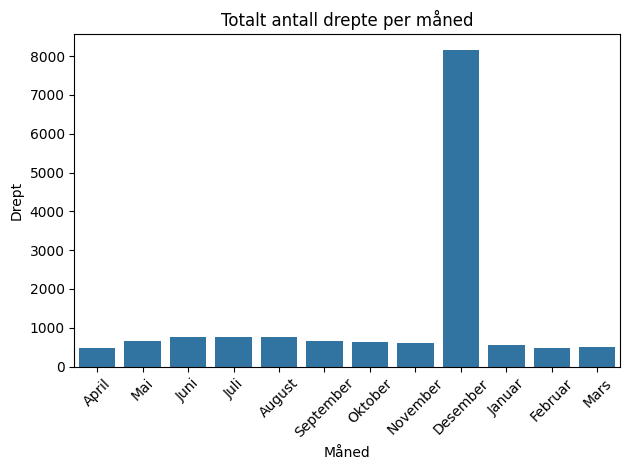

In [7]:

sns.barplot(data=df, x="Måned", y="Drept", estimator=sum, ci=None)
plt.title("Totalt antall drepte per måned")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 4. Dødsulykker per måned
**Observasjon:** Desember skiller seg unormalt ut også her – samme feilindikasjon.  
**Tolkning:** Ser vi bort fra desember, er vår og høst mer utsatt. Dette kan knyttes til glatte veier og mørkere kjøreforhold.


## 5. Lettere skader over tid

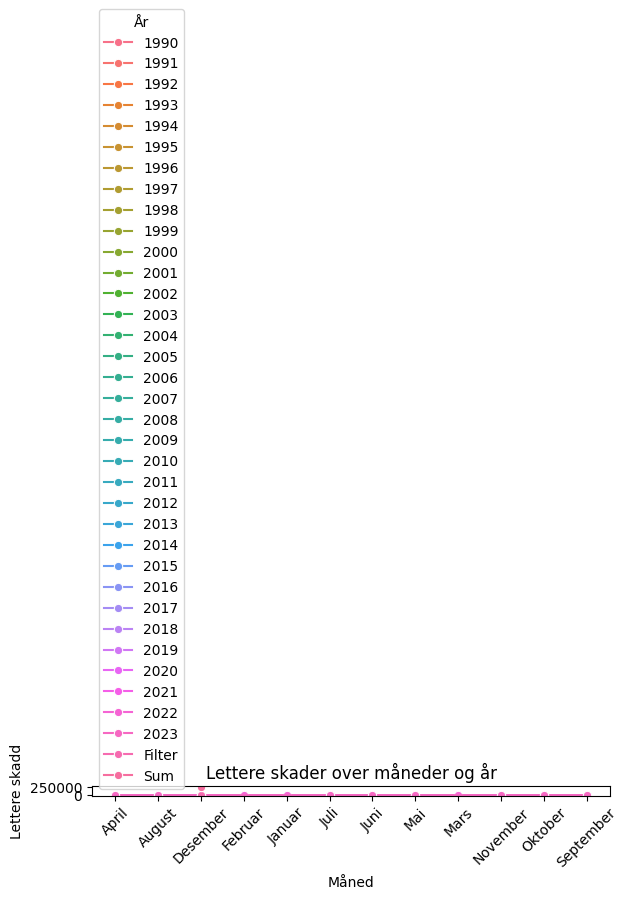

In [10]:

monthly = df.groupby(["År", "Måned"])["Lettere skadd"].sum().reset_index()
sns.lineplot(data=monthly, x="Måned", y="Lettere skadd", hue="År", marker="o")
plt.title("Lettere skader over måneder og år")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Tolkning:** Det er sesongvariasjon i lettere skader, med topp i sommermånedene.

## 6. Andel av skadegrader

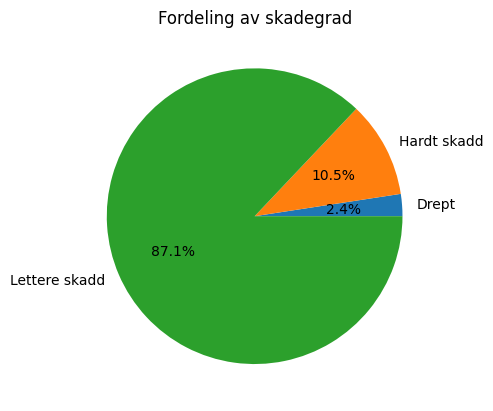

In [11]:

skade_summer = df[["Drept", "Hardt skadd", "Lettere skadd"]].sum()
skade_summer.plot(kind="pie", autopct="%1.1f%%", ylabel="")
plt.title("Fordeling av skadegrad")
plt.show()


### 5. Fordeling av skadegrad
**Observasjon:**  
- Lettere skadd: **87 %**  
- Hardt skadd: **10.5 %**  
- Drept: **2.4 %**  
**Tolkning:** De fleste ulykker er mindre alvorlige, men 1 av 10 er alvorlige nok til å kreve omfattende behandling.


## 7. Skadegrad etter ukedagstype

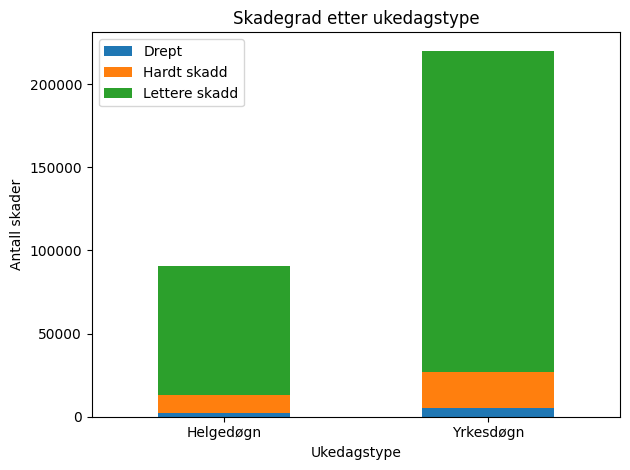

In [12]:

df_grouped = df.groupby("Ukedagstype")[["Drept", "Hardt skadd", "Lettere skadd"]].sum()
df_grouped.plot(kind="bar", stacked=True)
plt.title("Skadegrad etter ukedagstype")
plt.ylabel("Antall skader")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 6. Skadegrad etter ukedagstype
**Observasjon:** Yrkesdøgn har flere tilfeller i alle tre skadeklasser.  
**Tolkning:** Bekrefter høyere risiko i hverdager og behov for sikkerhetstiltak i rushtid.


## ✅ Konklusjon

- **Datakvalitet:** Tydelig feil i desemberdata; disse bør undersøkes og evt. korrigeres før videre bruk.
- **Yrkesdøgn dominerer** skadebildet – både i volum og alvorlighetsgrad.
- **Lettere skader er mest vanlig**, men andel hardt skadde er betydelig nok til å kreve oppfølging.
- **Helgedøgn inneholder enkelte ekstreme tilfeller**, som kan peke mot spesifikke risikoscenarier (rus, natt).
- **Forebygging bør styrkes på hverdager**, spesielt i morgen- og ettermiddagstrafikk.
- **Vår og høst** bør ha målrettede kampanjer og kontrolltiltak.
- Det anbefales å **validere datasettet** og fjerne utliggere før videre bruk i maskinlæring eller modellering.
